In [1]:
from utils import *
from sklearn.cluster import KMeans

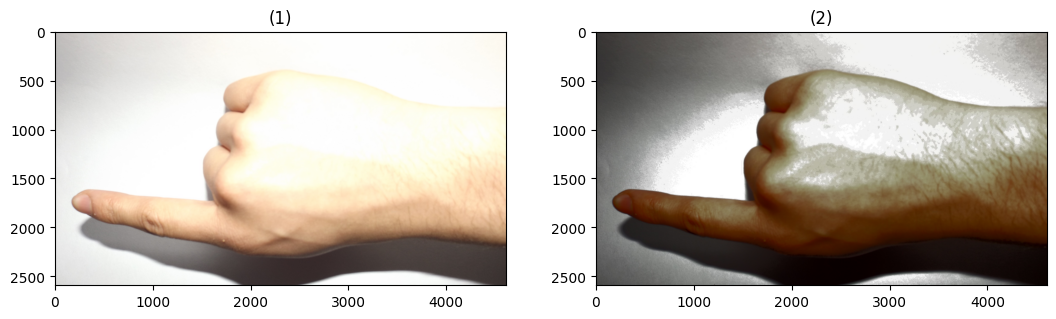

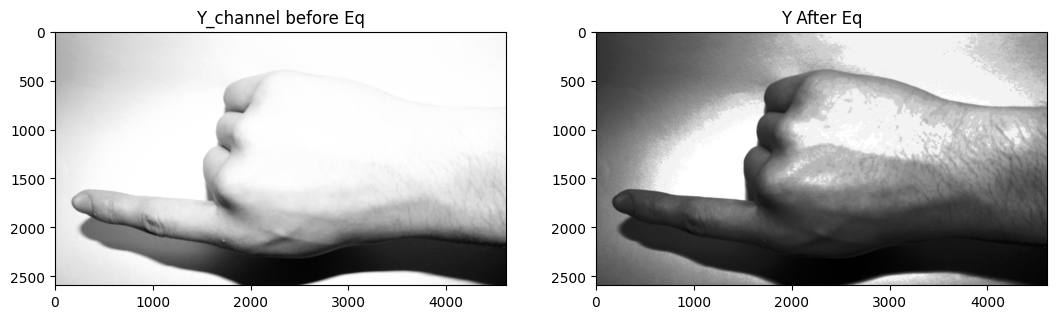

In [3]:
img=cv2.imread('../data/men/1/1_men (34).JPG')

img_YUV=cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
Y,U,V=cv2.split(img_YUV)


Y_Eq=cv2.equalizeHist(Y)

img_eq=cv2.merge([Y_Eq,U,V])

img_eq=cv2.cvtColor(img_eq,cv2.COLOR_YUV2RGB)
show_images([cv2.cvtColor(img,cv2.COLOR_BGR2RGB),img_eq])
show_images([Y,Y_Eq],['Y_channel before Eq','Y After Eq'])



In [7]:

# Kmeans Clustering
clusters=3
clt = KMeans(n_clusters = clusters)

# reshape the image to be a list of pixels
image = img_eq.reshape((img_eq.shape[0] * img_eq.shape[1], 3))
clt.fit(image)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [8]:
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

	# return the histogram
    return hist

In [9]:
def plot_colors(hist,centroids):
    bar=np.zeros((50,300,3),dtype="uint8")
    startX = 0

    for(percent,color) in zip(hist, centroids):
        endX=startX + (percent * 300)

        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
        startX = endX
        
	# return the bar chart
    return bar

[0.33627884 0.35035988 0.31336127]
[[ 63.226148    37.89327861  20.44874074]
 [224.24059688 223.89768049 219.95061649]
 [132.80421543 127.45304854 112.52590583]]


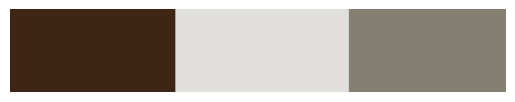

In [22]:
hist =centroid_histogram(clt)

print(hist)
print(clt.cluster_centers_)
center=clt.cluster_centers_
bar = plot_colors(hist, clt.cluster_centers_)

plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()




In [34]:
# show_images([img_eq==center[0]])
lables=clt.predict(img_eq.reshape((img_eq.shape[0] * img_eq.shape[1], 3)))

print(lables)
# print(img_eq)
# # lables=clt.predict()
# print(np.shape((img_eq.shape[0] * img_eq.shape[1], 3)))

[0 0 0 ... 0 0 0]


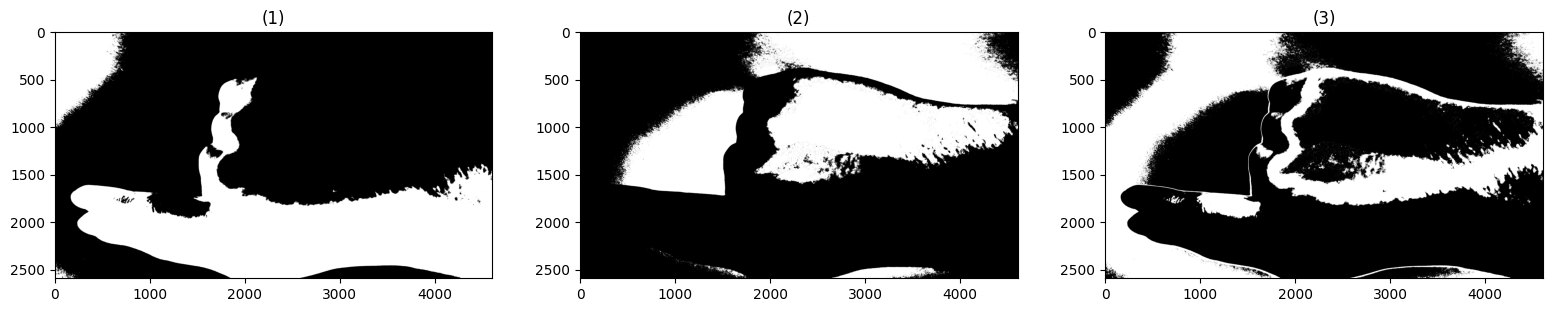

In [37]:
lables=lables.reshape((img_eq.shape[0] ,img_eq.shape[1]))
show_images([(lables==0)*255,(lables==1)*255,(lables==2)*255])

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0.29917257 0.22731795 0.27947312 0.19403637]


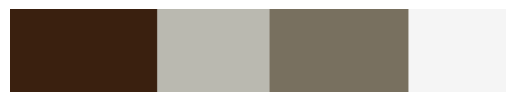

In [16]:
clusters2=4
clt2 = KMeans(n_clusters = clusters)

# reshape the image to be a list of pixels
image2 = img_eq.reshape((img_eq.shape[0] * img_eq.shape[1], 3))
clt2.fit(image2)




[0.29917257 0.22731795 0.27947312 0.19403637]
[[ 58.84700142  32.87122093  15.92728265]
 [186.48072187 185.61438909 176.31634164]
 [120.64255423 112.27950781  95.71686606]
 [245.89564533 245.8161608  245.22247901]]


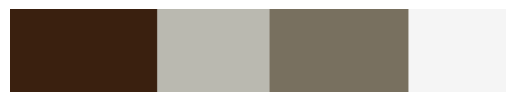

In [ ]:

hist2 =centroid_histogram(clt2)

print(hist2)
print(clt2.cluster_centers_)
centers2=clt2.cluster_centers_
bar2 = plot_colors(hist2, clt2.cluster_centers_)

plt.figure()
plt.axis("off")
plt.imshow(bar2)
plt.show()


show_images([img_eq==centers2[0],img_eq==centers2[1],img_eq==centers2[2],img_eq==centers2[3]])


[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


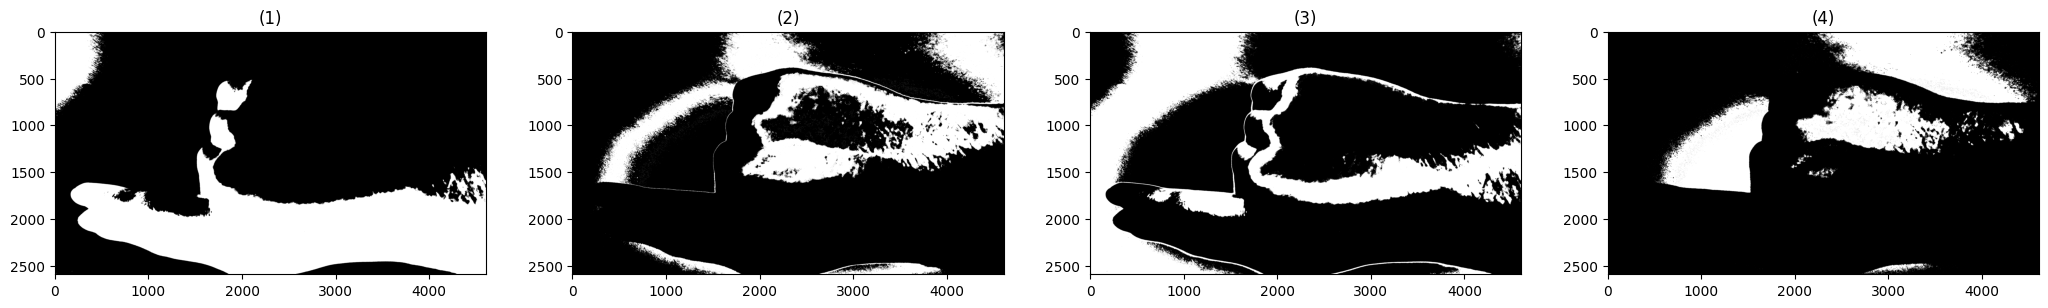

In [38]:
lables2=clt2.predict(img_eq.reshape((img_eq.shape[0] * img_eq.shape[1], 3)))
print(lables)

lables2=lables2.reshape((img_eq.shape[0] ,img_eq.shape[1]))
show_images([(lables2==0)*255,(lables2==1)*255,(lables2==2)*255,(lables2==3)*255])

# img=cv2.imread('../data/men/1/1_men (34).JPG')

# img_YUV=cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
# Y,U,V=cv2.split(img_YUV)


# Y_Eq=cv2.equalizeHist(Y)

# img_eq=cv2.merge([Y_Eq,U,V])

# img_eq=cv2.cvtColor(img_eq,cv2.COLOR_YUV2RGB)
# show_images([cv2.cvtColor(img,cv2.COLOR_BGR2RGB),img_eq])
# show_images([Y,Y_Eq],['Y_channel before Eq','Y After Eq'])


In [39]:
clusters3=2
clt3 = KMeans(n_clusters = clusters3)

# reshape the image to be a list of pixels
image = img_eq.reshape((img_eq.shape[0] * img_eq.shape[1], 3))
clt3.fit(image)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

[0.4585408 0.5414592]
[[208.42923588 207.86085067 201.85710933]
 [ 84.75415919  66.18967487  49.25051606]]


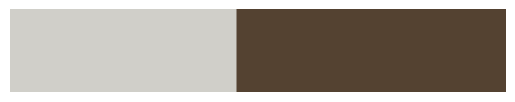

NameError: name 'centers2' is not defined

In [40]:

hist3 =centroid_histogram(clt3)

print(hist3)
print(clt3.cluster_centers_)
centers3=clt3.cluster_centers_
bar3 = plot_colors(hist3, clt3.cluster_centers_)

plt.figure()
plt.axis("off")
plt.imshow(bar3)
plt.show()


# show_images([img_eq==centers2[0],img_eq==centers2[1],img_eq==centers2[2],img_eq==centers2[3]])


[1 1 1 ... 1 1 1]


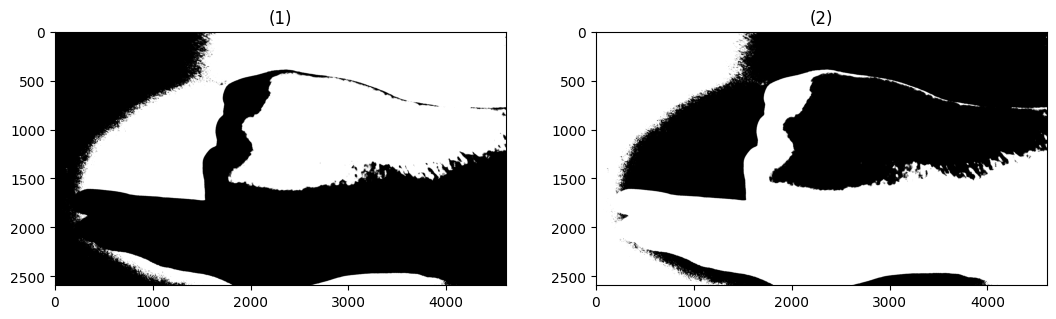

In [41]:
lables3=clt3.predict(img_eq.reshape((img_eq.shape[0] * img_eq.shape[1], 3)))
print(lables3)

lables3=lables3.reshape((img_eq.shape[0] ,img_eq.shape[1]))
show_images([(lables3==0)*255,(lables3==1)*255])

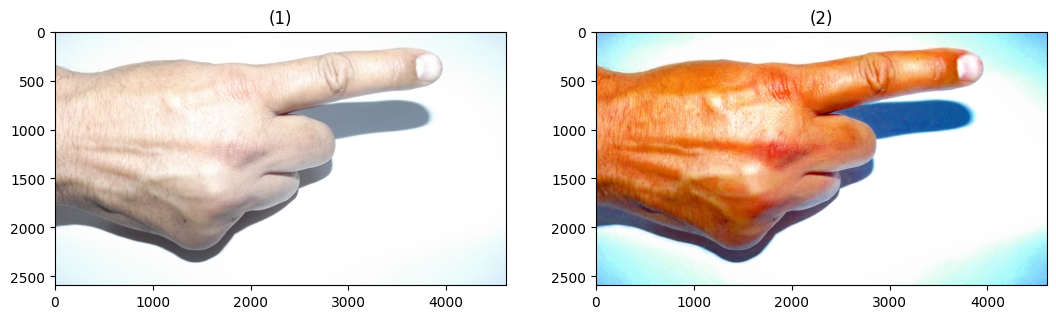

In [45]:
img1 = cv2.imread('../data_split/split/men/train/1/1_men (139).JPG')
img_hsv=cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

H=img_hsv[:,:,0]
S=img_hsv[:,:,1]
V=img_hsv[:,:,2]


#Equalize S
img_HSV_eq=np.copy(img_hsv)
img_HSV_eq[:,:,1]=cv2.equalizeHist(img_HSV_eq[:,:,1])
img_eq=cv2.cvtColor(img_HSV_eq, cv2.COLOR_HSV2RGB)

show_images([cv2.cvtColor(img1, cv2.COLOR_BGR2RGB),img_eq])

In [49]:
clusters3=3
clt4 = KMeans(n_clusters = clusters3)

# reshape the image to be a list of pixels
image = img_eq.reshape((img_eq.shape[0] * img_eq.shape[1], 3))
clt4.fit(image)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

[0.31618338 0.57108863 0.112728  ]
[[228.59162907 134.41067624  73.24366099]
 [237.29621527 249.53194963 247.90931022]
 [ 92.69875637  76.69947354  91.56166142]]


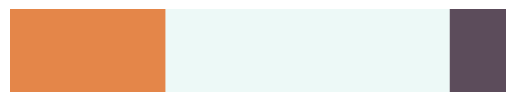

[1 1 1 ... 1 1 1]


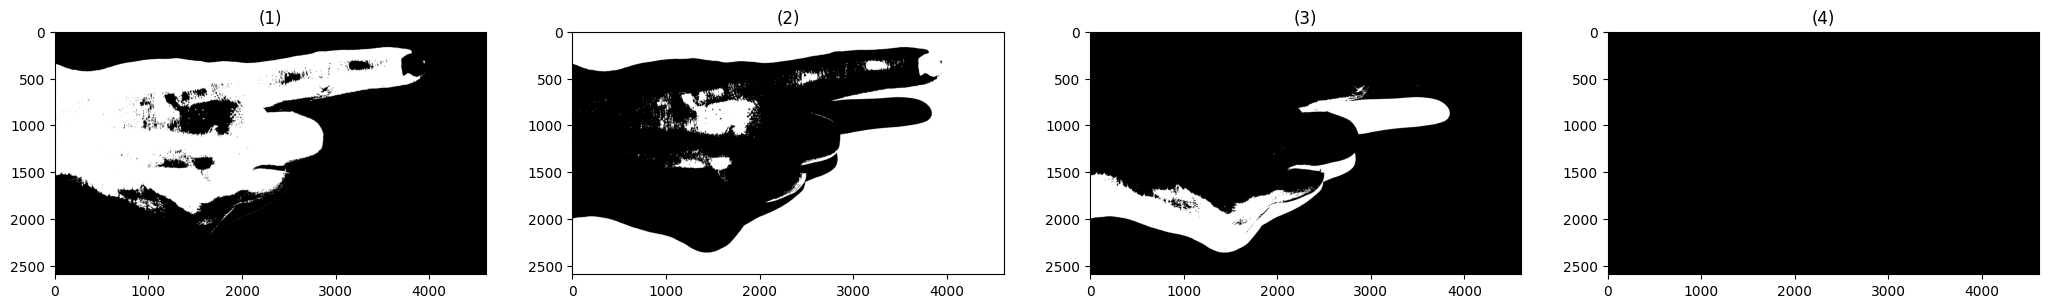

In [50]:
hist4 =centroid_histogram(clt4)

print(hist4)
print(clt4.cluster_centers_)
centers4=clt4.cluster_centers_
bar4 = plot_colors(hist4, clt4.cluster_centers_)

plt.figure()
plt.axis("off")
plt.imshow(bar4)
plt.show()


lables4=clt4.predict(img_eq.reshape((img_eq.shape[0] * img_eq.shape[1], 3)))
print(lables4)

lables4=lables4.reshape((img_eq.shape[0] ,img_eq.shape[1]))
show_images([(lables4==0)*255,(lables4==1)*255,(lables4==2)*255,(lables4==3)*255])

In [53]:
hand_mask=(lables4==0)*255
kernel = np.ones((5, 5), np.uint8)

print(hand_mask)
hand_mask = cv2.morphologyEx(hand_mask, cv2.MORPH_DILATE, kernel, iterations=2) #Dilate Back 

show_images([hand_mask])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


error: OpenCV(4.7.0) D:/a/opencv-python/opencv-python/opencv/modules/imgproc/src/morph.simd.hpp:756: error: (-213:The function/feature is not implemented) Unsupported data type (=4) in function 'cv::opt_AVX2::getMorphologyRowFilter'


In [7]:
import numpy as np
x=cv2.inRange(np.array([0,0,0]), np.array([-5,2,3]),  np.array([1,-2,-3]))
print(x)

print(np.sum(x*1))

[[255]
 [  0]
 [  0]]
255
